# Decision Tree ID3 Algorithm and application of different handling missing value strategy

## Abstract

Missing value is a significant challeng in real-world machine learning application, directly impacting model performance. This activity investigate varius method for handling whit missing values starting from the ones seeing during the lession and also introducing interesting more advance method. Also in the first part i implement the ID3 from scratch for gain more deeply understending on the algorithm even if it isen't the main part in this activities.

---
### ID3 Theory

---
## Missing Value Handling Strategy
- Row Deletion
- Replacing whit most frequent
- Replace missing values with the most
frequent value within each class
- Fractional Examples Aproch
- k-NN Imputation

---
## Dataset
- Titanic
- Adult Income

I choese to use this two dataset for explore the difference between the varius method in base of the different size ..

---
Usage of AI -> formalizing the idea, finding dataset, help whit the code of the plot
## Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
income_train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
income_test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"


In [54]:
# Datasets
#----Titanic----
titanic_row = sns.load_dataset('titanic').copy()
target_name = 'survived'
base_features = ['sex','pclass','age','fare','sibsp','parch','embarked','deck']

features_titanic = titanic_row[base_features].copy()
labels_titanic = titanic_row[target_name].copy()

mask_not_null = features_titanic["sex"].notna()
features_titanic.loc[~mask_not_null, "sex"] = np.nan  # Keep NaN
features_titanic.loc[mask_not_null, "sex"] = np.where(
    features_titanic.loc[mask_not_null, "sex"] == "female", 1, 0
)

mask_not_null = features_titanic["embarked"].notna()
cond = [
    features_titanic["embarked"].eq("S") & mask_not_null,
    features_titanic["embarked"].eq("C") & mask_not_null,
    features_titanic["embarked"].eq("Q") & mask_not_null,
]
choices = [0, 1, 2]
features_titanic["embarked"] = np.select(cond, choices, default=np.nan)

mask_not_null = features_titanic["deck"].notna()
cond = [features_titanic["deck"].eq(x) & mask_not_null for x in list("ABCDEFG")] + \
       [features_titanic["deck"].eq("T") & mask_not_null]
choices = [1, 2, 3, 4, 5, 6, 7, 8]
features_titanic["deck"] = np.select(cond, choices, default=np.nan)

features_titanic = features_titanic.astype(float)


print(features_titanic.head())
print(features_titanic.columns)
print(features_titanic.shape, labels_titanic.shape)

print("---------------------------")

#----Adult Income----
cols = [
    "age","workclass","fnlwgt","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"

]
target_name = "income"

adult_train = pd.read_csv(
    income_train_url, names=cols, skipinitialspace=True
)
adult_test = pd.read_csv(
    income_test_url, names=cols, skipinitialspace=True, skiprows=1
)

adult = pd.concat([adult_train, adult_test], ignore_index=True)
adult1 = adult.copy()
adult[target_name] = adult[target_name].astype(str).str.replace(".", "", regex=False).str.strip()
bolean_label = {">50K": 1, "<=50K": 0}
adult["income"] = adult["income"].map(bolean_label).astype("Int8")
adult = adult.replace("?", np.nan)
adult["sex"] = adult["sex"].map({"Male":0, "Female":1}).astype("float")
# Age column wrong in the dataset dosent indicate the age
adult.rename(columns={"age": "employment_status"}, inplace=True)
def encode_col(df, col):
    cats = sorted(df[col].dropna().unique().tolist())
    mp = {k:i for i,k in enumerate(cats)}
    return df[col].map(mp).astype("float")

for col in ["employment_status","workclass","marital_status","occupation","fnlwgt",
            "relationship","race","native_country"]:
    adult[col] = encode_col(adult, col)


features_adult = adult.drop(columns=[target_name]).copy()
features_adult = features_adult.astype(float)

labels_adult   = adult[target_name].copy()


print(features_adult.head())
print(features_adult.columns)
print(features_adult.shape, labels_adult.shape)


   sex  pclass   age     fare  sibsp  parch  embarked  deck
0  0.0     3.0  22.0   7.2500    1.0    0.0       0.0   NaN
1  1.0     1.0  38.0  71.2833    1.0    0.0       1.0   3.0
2  1.0     3.0  26.0   7.9250    0.0    0.0       0.0   NaN
3  1.0     1.0  35.0  53.1000    1.0    0.0       0.0   3.0
4  0.0     3.0  35.0   8.0500    0.0    0.0       0.0   NaN
Index(['sex', 'pclass', 'age', 'fare', 'sibsp', 'parch', 'embarked', 'deck'], dtype='object')
(891, 8) (891,)
---------------------------
   employment_status  workclass  fnlwgt  education_num  marital_status  \
0                6.0     3461.0     9.0           13.0             4.0   
1                5.0     3788.0     9.0           13.0             2.0   
2                3.0    18342.0    11.0            9.0             0.0   
3                3.0    19995.0     1.0            7.0             2.0   
4                3.0    25405.0     9.0           13.0             2.0   

   occupation  relationship  race  sex  capital_gain  cap

# Implementation of ID3 Algorithm

Chose the most discriminatory
partition data o feature values
like split on age whit muliple features
and next from the fraturees crate from ages calcualte the entropy for all the features and select the one whti the most entropy and select the features exemplet sex and go down in recoursive way

when reach the base and recoursive call on each partition
watch all the brench and then come to the age again and also gi


The ID3 (Iterative Dichotomiser3) Algorithm is a greedy algorithm that build a decision tree by ecursively partitioning the data into a smaller and smaller subsets untill data points in each subset belong to the same class. This decision tree is used for both classification and regression tasks.
The ID3 algo works by building a decision tree that classifies data points into different categories and split the dataset into a smaller subset based on the values of the feturse in the dataset then select the feature that provides the most information about the target variable.

This algo utilize metrices related to information theroy particularly entropy and information gain, to make decisions during the tree-building process.

**Information Gain and Attribute Selection**
The ID3 use a measure of impurity to calculate the iformation gain of each atribute. Entropy is a measure of disorder in a dataset, so a dataset whit high entropy is a dataset where the data points are evenly distributed across the diferent category, **??????**  conversely a dataset whit lo entropy is a dataset where the data points are concatenated in one or few categories.

**Calculating the entrophy**
\begin{equation}
E(S) = - \sum_{i=1}^{C} P_i \log_2(P_i)
\end{equation}
- $C$ number of classes
- $ P_i $ fracton of the sample whitin a particular node.
- $ S $ is the current dataset
- $ i $ is set of classes in $ S $

**Information Gain**
\begin{equation}
IG(A, S) = E(S) - \sum_{v} \frac{|S_v|}{|S|} E(S_v)
\end{equation}
- $|S|$ is the total number of istances in dataset
- $|S_v|$ is the number of istances in dataset for which attribute D has value $v$
- $H(S)$ is the entropy of the dataset

Then we select the feature whit the higest information gain and iterativly we apply all the steps above for building the decision tree

Theory of the ID3 seen in class and also [geeksforgeeks](https://www.geeksforgeeks.org/machine-learning/sklearn-iterative-dichotomiser-3-id3-algorithms/)

In [3]:
# ENTROPHY CALCULATION
def entropy(y):   # y: labels
  total_row = len(y)
  unique_labels, counts = np.unique(y, return_counts=True) # unique labels and their counts
  P = counts / total_row # Computing probability
  return -np.sum(P * np.log2(P)) # Entrophy formula

# INFORMATION GAIN CALCULATION
def information_gain(X_col, y):   # X_col: feature column, y: labels
  gain = entropy(y)
  unique_val = np.unique(X_col)
  # for each unique value on X_col calculate the wighted entropy
  for value in unique_val:
    y_split = y[X_col == value]
    gain -= (len(y_split) / len(y)) * entropy(y_split)
  return gain

# ID3 DECISION TREE ALGORITHM (RECOURSIVE)
def id3(X, y, depth = 0, max_depth = None):   # X: feature, y: labels, depth: current depth, max_depth: maximum depth of tree
  # all labels are the same
  if len(np.unique(y)) == 1:
    return y[0]

  # no feature left or max depth reached
  if X.empty or (max_depth is not None and depth >= max_depth):
    return np.bincount(y).argmax()

  # calculation gain for all the features
  gains = [information_gain(X[col], y) for col in X.columns]
  # select the feature with best information gain
  best_feature = X.columns[np.argmax(gains)]
  # create tree node
  tree = {best_feature: {}}
  # split on each unique value of the best feature
  for value in np.unique(X[best_feature]):
    data_sub = X[X[best_feature] == value]
    label_sub = y[X[best_feature] == value]
    # recoursive call, build the subtree
    tree[best_feature][value] = id3(
        data_sub.drop(columns=[best_feature]), # feature already used
        label_sub,
        depth+1,
        max_depth
      )
  return tree

def fit_id3(X_train: pd.DataFrame, y_train, max_depth=None):
  y_arr = np.asarray(y_train)
  classes, y_enc = np.unique(y_arr, return_inverse=True)
  majority = int(np.bincount(y_enc).argmax())
  tree = id3(X_train, y_enc, depth=0, max_depth=max_depth)
  return{
      "tree": tree,
      "classes": classes,
      "majority": majority
  }

def predict_id3(model, X_test: pd.DataFrame):
  classes = model["classes"]
  majority_idx = model["majority"]
  majority_label = classes[majority_idx]

  predictions = []

  for _,x in X_test.iterrows():
    subtree = model["tree"]
    predicted = None
    while isinstance(subtree, dict):
      feat = next(iter(subtree))
      val = x.get(feat, np.nan)
      if pd.isna(val):
        predicted = majority_label
        break
      branch = subtree[feat].get(val, None)
      if branch is None:
        predicted = majority_label
        break
      subtree = branch
    if predicted is None:
      predicted = classes[int(subtree)]
    predictions.append(predicted)

  return np.array(predictions)

## Introducing artificially missing value in the datasets

In [4]:
# Introduce artifically missing
def artificial_missing(dataset, cols=None, missing_rate = 0.15, random_state=42):
  random = np.random.default_rng(random_state)
  dataset_missing = dataset.copy()

  if cols is None:
    cols = dataset.columns.tolist()
  # all mask false
  mask = pd.DataFrame(False, index=dataset.index, columns=dataset.columns)
  for c in cols:
    not_NaN_idx = dataset[c].notna().values
    n = not_NaN_idx.sum()
    k = int(np.round(missing_rate * n))
    if k == 0:
      continue
    inject_positions = np.where(not_NaN_idx)[0]
    chosen = random.choice(inject_positions, size=k, replace=False)
    dataset_missing.loc[dataset.index[chosen], c] = np.nan
    # put in the mask df True where we artificially NaN the value
    mask.loc[dataset.index[chosen], c] = True

  return dataset_missing, mask

## Managing missing values whit different methods

In [63]:
# Del the row
def delete_row(dataset):
  ds_clean = dataset.copy()
  ds_clean = ds_clean.dropna()
  return ds_clean

# Replacing whit most frequent
def most_frequent(dataset):
  X = dataset.copy()
  for col in X.columns:
    if X[col].isnull().any():
      most_frequent = X[col].mode()[0]
      X.fillna({col: most_frequent}, inplace=True)
  return X

# Replacing whit the most frequent whitin each class
def most_frequent_by_class(dataset, feature):
  X = dataset.copy()
  y = feature.copy()
  y_class = y.unique()

  for col in X.columns:
    missing_bool = X[col].isnull()
    for class_val in y_class:
      mask = missing_bool & (y == class_val)
      if mask.any():
        most_frequent = X.loc[y == class_val, col].mode()[0]
        X.loc[mask, col] = most_frequent
  return X

# Replacing missing value whit mean
def mean_method(dataset):
  X = dataset.copy()
  for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())
  X = X.round()
  return X

# Replacing missing value whit median
def median_method(dataset):
  X = dataset.copy()
  for col in X.columns:
    X[col] = X[col].fillna(X[col].median())
  return X

# Predicting the missig value whit Knn
def knn_method(dataset):
  X = dataset.copy()
  imputer = KNNImputer(n_neighbors=2, weights='distance')
  after_imputation = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
  return after_imputation




# Plotting the resoult of the accuracy of the missing value prediction where is possibol

In [64]:
# ---TITANIC ---
X_t = features_titanic.copy()
y_t = labels_titanic.copy()

X_miss_titanic , mask_titanic = artificial_missing(X_t)

result_summary_titanic = {}
imputed_titanic = {}

# Dropping row method
X_drop = delete_row(X_miss_titanic)
imputed_titanic["Drop_Row"] = X_drop
coverage = len(X_drop) / len(X_miss_titanic)
result_summary_titanic["Drop_Row"] = {
    "cells": int(mask_titanic.values.sum()),
    "correct": 0,
    "accuracy": 0.0
}

# Most frequent
X_freq = most_frequent(X_miss_titanic)
imputed_titanic["Most_Frequent"] = X_freq
correct = ((X_freq == X_t) & mask_titanic).values.sum()
cells = int(mask_titanic.values.sum())
result_summary_titanic["Most_Frequent"] = {
    "cells": cells,
    "correct": int(correct),
    "accuracy": float(correct / cells if cells else float("NaN"))
}

# Most frequent whit each class
X_freq_class = most_frequent_by_class(X_miss_titanic, y_t)
X_freq_class.index = y_t.index
imputed_titanic["Most_Frequent_whit_Class"] = X_freq_class
correct = ((X_freq_class == X_t) & mask_titanic).values.sum()
cells = int(mask_titanic.values.sum())
result_summary_titanic["Most_Frequent_whit_Class"] = {
    "cells": cells,
    "correct": int(correct),
    "accuracy": float(correct / cells if cells else float("NaN"))
}

# Mean
X_mean = mean_method(X_miss_titanic)
imputed_titanic["Mean"] = X_mean
correct = ((X_mean == X_t) & mask_titanic).values.sum()
cells = int(mask_titanic.values.sum())
result_summary_titanic["Mean"] = {
    "cells": cells,
    "correct": int(correct),
    "accuracy": float(correct / cells if cells else float("NaN"))
}

# Median
X_median = median_method(X_miss_titanic)
imputed_titanic["Median"] = X_median
correct = ((X_median == X_t) & mask_titanic).values.sum()
cells = int(mask_titanic.values.sum())
result_summary_titanic["Median"] = {
    "cells": cells,
    "correct": int(correct),
    "accuracy": float(correct / cells if cells else float("NaN"))
}

# KNN
X_knn = knn_method(X_miss_titanic)
X_knn.index = X_miss_titanic.index
imputed_titanic["KNN"] = X_knn
correct = ((X_knn == X_t) & mask_titanic).values.sum()
cells = int(mask_titanic.values.sum())
result_summary_titanic["KNN"] = {
    "cells": cells,
    "correct": int(correct),
    "accuracy": float(correct / cells if cells else float("NaN"))
}


# --- ADULTS ---
X_a = features_adult.copy()
y_a = labels_adult.copy()
X_miss_adult, mask_adult = artificial_missing(X_a)

result_summary_adult = {}
imputed_adult = {}

# Dropping row method
X_dropA = delete_row(X_miss_adult)
imputed_adult["Drop_Row"] = X_dropA
coverage = len(X_dropA) / len(X_miss_adult)
result_summary_adult["Drop_Row"] = {
    "cells": int(mask_adult.values.sum()),
    "correct": 0,
    "accuracy": 0.0,
}

# Most frequent
X_freqA = most_frequent(X_miss_adult)
imputed_adult["Most_Frequent"] = X_freqA
correct = ((X_freqA == X_a) & mask_adult).values.sum()
cells = int(mask_adult.values.sum())
result_summary_adult["Most_Frequent"] = {
    "cells": cells,
    "correct": int(correct),
    "accuracy": float(correct / cells if cells else float("NaN"))
}

# Most frequent whit each class
X_freq_class_A = most_frequent_by_class(X_miss_adult, y_a)
X_freq_class_A.index = y_a.index
imputed_adult["Most_Frequent_whit_Class"] = X_freq_class_A
correct = ((X_freq_class_A == X_a) & mask_adult).values.sum()
cells = int(mask_adult.values.sum())
result_summary_adult["Most_Frequent_whit_Class"] = {
    "cells": cells,
    "correct": int(correct),
    "accuracy": float(correct / cells if cells else float("NaN"))
}

# Mean
X_meanA = mean_method(X_miss_adult)
imputed_adult["Mean"] = X_meanA
correct = ((X_meanA == X_a) & mask_adult).values.sum()
cells = int(mask_adult.values.sum())
result_summary_adult["Mean"] = {
    "cells": cells,
    "correct": int(correct),
    "accuracy": float(correct / cells if cells else float("NaN"))
}

# Median
X_medianA = median_method(X_miss_adult)
imputed_adult["Median"] = X_medianA
correct = ((X_medianA == X_a) & mask_adult).values.sum()
cells = int(mask_adult.values.sum())
result_summary_adult["Median"] = {
    "cells": cells,
    "correct": int(correct),
    "accuracy": float(correct / cells if cells else float("NaN"))
}

# KNN -> calulate on 30% of the dataset
X_knnA = knn_method(X_miss_adult)
X_knnA.index = X_miss_adult.index
imputed_adult["KNN"] = X_knnA
correct = ((X_knnA == X_a) & mask_adult).values.sum()
cells = int(mask_adult.values.sum())
result_summary_adult["KNN"] = {
    "cells": cells,
    "correct": int(correct),
    "accuracy": float(correct / cells if cells else float("NaN"))
}


In [65]:
pd.DataFrame(result_summary_titanic).T

,cells,correct,accuracy
Drop_Row,940.0,0.0,0.000000
Most_Frequent,940.0,473.0,0.503191
Most_Frequent_whit_Class,940.0,490.0,0.521277
Mean,940.0,347.0,0.369149
Median,940.0,466.0,0.495745
KNN,940.0,337.0,0.358511


In [66]:
pd.DataFrame(result_summary_adult).T

,cells,correct,accuracy
Drop_Row,94269.0,0.0,0.000000
Most_Frequent,94269.0,51833.0,0.549841
Most_Frequent_whit_Class,94269.0,52889.0,0.561043
Mean,94269.0,23742.0,0.251854
Median,94269.0,49572.0,0.525857
KNN,94269.0,42397.0,0.449745


# Train and Plotting the ID3 algo for each method

In [27]:
splits_titanic = {}
models_titanic = {}
metrics_titanic = {}

for name, X in imputed_titanic.items():
  # align the index (for the delete row method)
  y = y_t.loc[X.index]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



  model = fit_id3(X_train, y_train, max_depth=None)

  # Predictions
  y_pred = predict_id3(model, X_test)

  splits_titanic[name] = {
      "X_train": X_train,
      "X_test": X_test,
      "y_train": y_train,
      "y_test": y_test,
      "y_pred": y_pred
  }

  models_titanic[name] = model

  acc = accuracy_score(y_test, y_pred)
  metrics_titanic[name] = {
        "id3_accuracy": float(acc)
    }



In [10]:
perf_df = pd.DataFrame(metrics_titanic).T  # rows = metodo
perf_df = perf_df.sort_values("id3_accuracy", ascending=False)
display(perf_df)


,id3_accuracy
Most_Frequent_whit_Class,0.776536
Median,0.715084
Most_Frequent,0.709497
KNN,0.670391
Drop_Row,0.666667
Mean,0.642458


In [31]:
# Adults
splits_adults = {}
models_adults = {}
metrics_adults = {}

for name, X in imputed_adult.items():
  # align the index (for the delete row method)
  y = y_a.loc[X.index]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = fit_id3(X_train, y_train, max_depth=None)

  # Predictions
  y_pred = predict_id3(model, X_test)

  splits_adults[name] = {
      "X_train": X_train,
      "X_test": X_test,
      "y_train": y_train,
      "y_test": y_test,
      "y_pred": y_pred
  }
  models_adults[name] = model

  acc = accuracy_score(y_test, y_pred)
  metrics_adults[name] = {
        "id3_accuracy": float(acc)
    }



In [12]:
perf_df = pd.DataFrame(metrics_adults).T  # rows = metodo
perf_df = perf_df.sort_values("id3_accuracy", ascending=False)
display(perf_df)

,id3_accuracy
Most_Frequent_whit_Class,0.790357
Drop_Row,0.767528
Mean,0.758010
Median,0.756372
Most_Frequent,0.755144
KNN,0.738561


# Resolut Comparison

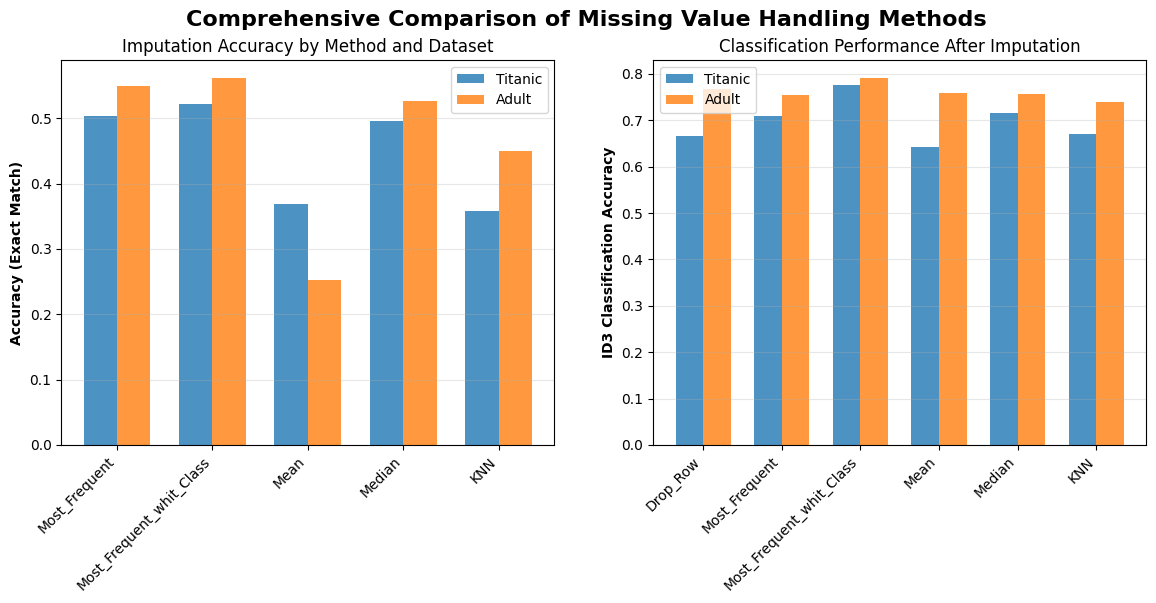

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Comprehensive Comparison of Missing Value Handling Methods',
             fontsize=16, fontweight='bold')

# Plot 1
methods = list(result_summary_titanic.keys())
acc_titanic = [result_summary_titanic[m]['accuracy'] for m in methods if m != 'Drop_Row']
acc_adult = [result_summary_adult[m]['accuracy'] for m in methods if m != 'Drop_Row']
methods_plot = [m for m in methods if m != 'Drop_Row']

x = np.arange(len(methods_plot))
width = 0.35

axes[0].bar(x - width/2, acc_titanic, width, label='Titanic', alpha=0.8)
axes[0].bar(x + width/2, acc_adult, width, label='Adult', alpha=0.8)
axes[0].set_ylabel('Accuracy (Exact Match)', fontweight='bold')
axes[0].set_title('Imputation Accuracy by Method and Dataset')
axes[0].set_xticks(x)
axes[0].set_xticklabels(methods_plot, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2
class_acc_titanic = [metrics_titanic[m]['id3_accuracy'] for m in methods]
class_acc_adult = [metrics_adults[m]['id3_accuracy'] for m in methods]

x = np.arange(len(methods))
axes[1].bar(x - width/2, class_acc_titanic, width, label='Titanic', alpha=0.8)
axes[1].bar(x + width/2, class_acc_adult, width, label='Adult', alpha=0.8)
axes[1].set_ylabel('ID3 Classification Accuracy', fontweight='bold')
axes[1].set_title('Classification Performance After Imputation')
axes[1].set_xticks(x)
axes[1].set_xticklabels(methods, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)



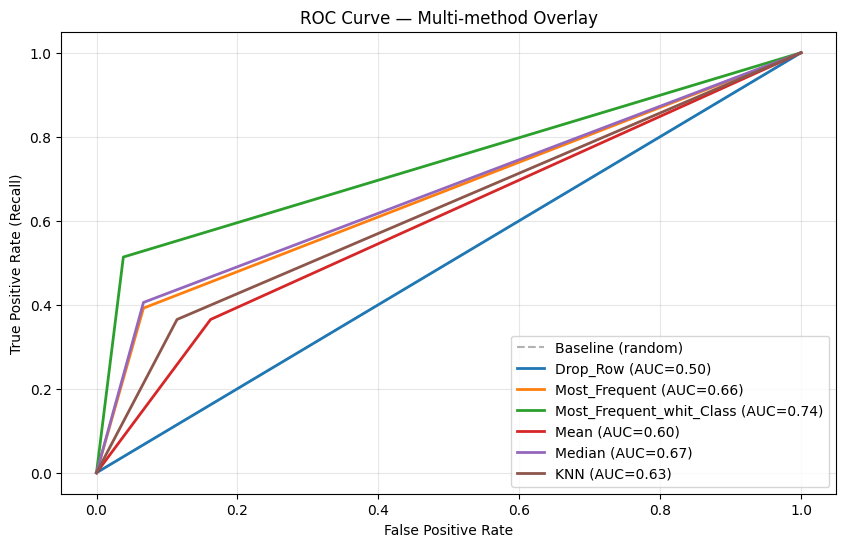

In [33]:

splits = splits_titanic
models = models_titanic

methods = list(splits.keys())

plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], '--', color='gray', alpha=0.6, label='Baseline (random)')

for name in methods:
    X_test = splits[name]["X_test"]
    y_test = splits[name]["y_test"]
    model  = models[name]

    # Prefer continuous scores (probabilities). Fallback to hard labels if needed.
    try:
        y_scores = model.predict_proba(X_test)[:, 1]
    except Exception:
        # Fallback so the plot still renders; better to expose probabilities from your ID3.
        y_scores = np.asarray(splits[name]["y_pred"]).astype(float)

    if len(y_scores) != len(y_test):
        raise ValueError(f"Length mismatch for '{name}': scores={len(y_scores)} vs y_test={len(y_test)}")

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve — Multi-method Overlay")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


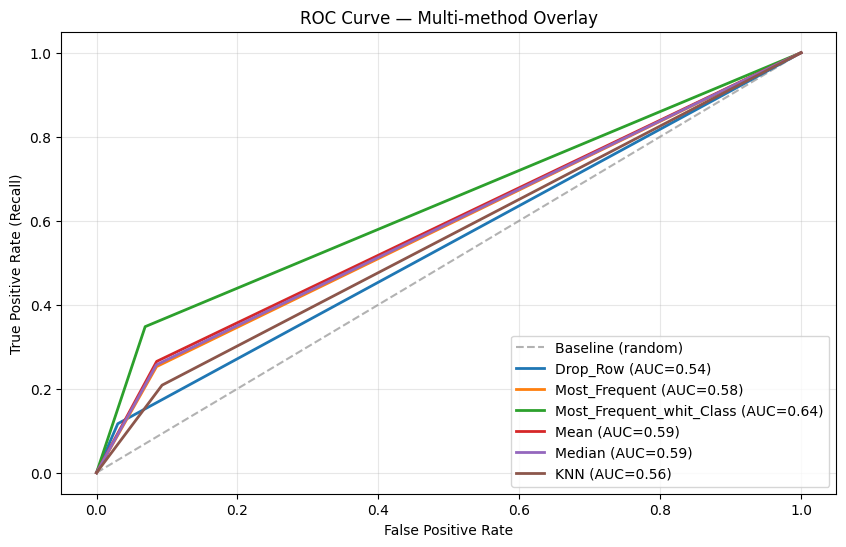

In [34]:


splits = splits_adults
models = models_adults

methods = list(splits.keys())

plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], '--', color='gray', alpha=0.6, label='Baseline (random)')

for name in methods:
    X_test = splits[name]["X_test"]
    y_test = splits[name]["y_test"]
    model  = models[name]

    # Prefer continuous scores (probabilities). Fallback to hard labels if needed.
    try:
        y_scores = model.predict_proba(X_test)[:, 1]
    except Exception:
        # Fallback so the plot still renders; better to expose probabilities from your ID3.
        y_scores = np.asarray(splits[name]["y_pred"]).astype(float)

    if len(y_scores) != len(y_test):
        raise ValueError(f"Length mismatch for '{name}': scores={len(y_scores)} vs y_test={len(y_test)}")

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve — Multi-method Overlay")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


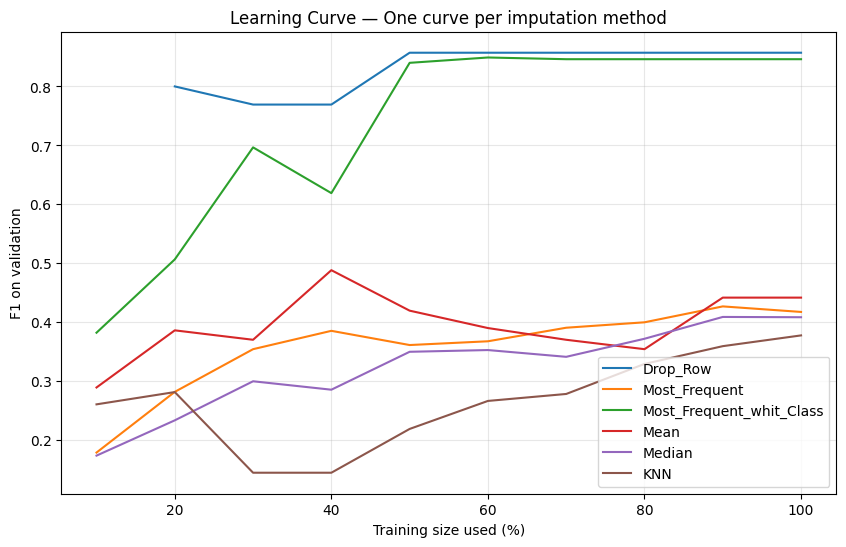

In [45]:


splits = splits_titanic
# uncomment for see in adults dataset (very slow)
# splits = splits_adults

methods = list(splits.keys())

# Learning-curve grid
train_fracs = np.linspace(0.1, 1.0, 10)
val_size    = 0.2                         # fixed validation split from each method's train pool
rng         = np.random.RandomState(42)

plt.figure(figsize=(10, 6))

for name in methods:
    # Start from each method's train data
    X_train_full = splits[name]["X_train"]
    y_train_full = splits[name]["y_train"]

    # Fixed validation split (stratify keeps class balance)
    X_tr_pool, X_val, y_tr_pool, y_val = train_test_split(
        X_train_full, y_train_full,
        test_size=val_size, random_state=42, stratify=y_train_full
    )

    # Shuffle once; then take increasing prefixes for the learning curve
    idx = rng.permutation(len(X_tr_pool))
    X_tr_pool = X_tr_pool.iloc[idx]
    y_tr_pool = y_tr_pool.iloc[idx]

    scores = []
    xs     = []

    for frac in train_fracs:
        n_keep = max(2, int(frac * len(X_tr_pool)))  # at least 2 samples
        # Ensure we don't exceed pool size (okay to use full pool at the end)
        n_keep = min(n_keep, len(X_tr_pool))

        X_small = X_tr_pool.iloc[:n_keep]
        y_small = y_tr_pool.iloc[:n_keep]

        # If very small subset ends up single-class, skip that point
        if getattr(y_small, "nunique", lambda: len(np.unique(y_small)))() < 2:
            scores.append(np.nan)
            xs.append(frac * 100.0)
            continue

        model_tmp = fit_id3(X_small, y_small, max_depth=None)
        y_val_hat = predict_id3(model_tmp, X_val)
        f1 = f1_score(y_val, y_val_hat, zero_division=0)

        scores.append(f1)
        xs.append(frac * 100.0)

    # Clean NaNs (may happen for tiny subsets)
    xs = np.array(xs)
    scores = np.array(scores)
    mask = ~np.isnan(scores)

    plt.plot(xs[mask], scores[mask], label=name)

plt.xlabel("Training size used (%)")
plt.ylabel("F1 on validation")
plt.title("Learning Curve — One curve per imputation method")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


# Thougts and future work